# Language in Politics

### Sources of Data:
* vote data https://github.com/unitedstates/congress/wiki/votes
* resources https://www.govtrack.us/about-our-data 
* bill text https://www.congress.gov/bill/115th-congress/senate-bill/43/text?format=txt
* tweet data https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/UIVHQR
* applied for API http://opensecrets.org/bulk-data

## Objective

## Data Collection:

In [ ]:
from CollectBills import *
from PoliStreamer import *

In [ ]:
# Scrape the bill ids from congress.gov
bill_ids, amdt_ids = get_bill_ids()

In [5]:
# Use bill ids to find bill data from probuclica's API 
# Push information to Graph DB using Neo4J
errors = populate_bills(bill_ids, amdt_ids)
print(len(errors))

In [ ]:
# Get the bill text data from congress.gov
# Push information to Graph
errors_text = write_bills(bill_ids, amdt_ids)
print(len(errors_text))

In [ ]:
# Get the vote data into Graph, downloaded from https://github.com/unitedstates/congress/wiki/votes
collect_votes()

In [126]:
# Add in last name to Representative nodes in Graph to match on
write_surname()

                     r.name    last_name
0             Keith Ellison      Ellison
1                Susan Wild         Wild
2           Daniel Lipinski     Lipinski
3           Warren Davidson     Davidson
4        Nydia M. Velázquez    Velazquez
5              Bill Shuster      Shuster
6          Mary Gay Scanlon      Scanlon
7            Troy Balderson    Balderson
8            Xavier Becerra      Becerra
9                Ryan Zinke        Zinke
10            Jeff Sessions     Sessions
11              Bill Foster       Foster
12           Steny H. Hoyer        Hoyer
13             Norma Torres       Torres
14             Mark Meadows      Meadows
15       Blaine Luetkemeyer  Luetkemeyer
16                John Faso         Faso
17              Brian Babin        Babin
18          Jodey Arrington    Arrington
19       Sheila Jackson Lee          Lee
20               Tom Marino       Marino
21            Tom MacArthur    MacArthur
22              Greg Walden       Walden
23              

In [ ]:
# Collect tweets for representatives with ids from 
# https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/UIVHQR
engage_discourse()

# Store them in Graph
overhear_conversation()

## Exploratory Data Analysis

In [ ]:
# Get bills that have been voted on
df = get_df_votes():

In [158]:
df.head()

,bar,bill,chamber,committees,d_cosponsors,r_cosponsors,subject,target,text
0,0.666667,FITARA Enhancement Act of 2017,hr,House Oversight and Government Reform Committee,1,2,Government Operations and Politics,1,Public Law 115 88 115th Congress An Act To am...
1,0.666667,BRAVE Act,hr,Senate Veterans' Affairs Committee,1,2,Armed Forces and National Security,1,115th CONGRESS 1st Session H. R. 974 ________...
2,0.500000,"Continuing Appropriations Act, 2018 and Supple...",hr,Senate Foreign Relations Committee,1,7,Economics and Public Finance,0,Public Law 115 56 115th Congress An Act Makin...
3,0.500000,"Department of Defense Appropriations Act, 2018",hr,Senate Judiciary Committee,1,21,Economics and Public Finance,1,"In the House of Representatives, U. S., Decem..."
4,0.500000,Bipartisan Budget Act of 2018,hr,Senate Judiciary Committee,1,8,Economics and Public Finance,0,BIPARTISAN BUDGET ACT OF 2018 Public Law 115 ...


In [164]:
len(df)

349

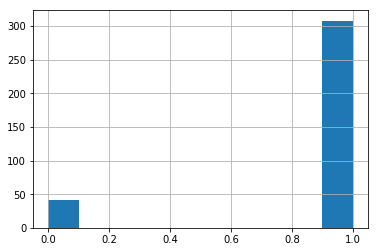

In [165]:
df['target'].hist()

Count of bills: 13556
Count of active bills: 4111
Count of inactive bills: 9445

Count of bills that made it to vote: 349
Count of bills that were voted on jointly: 55

In [214]:
# Get total bill data
t_df = get_df()

In [215]:
t_df.head()

,bar,bill,chamber,committees,d_cosponsors,r_cosponsors,subject,target,text,withdrawn
0,NaN,To modify provisions of law relating to refuge...,hr,House Ways and Means Committee,0,0,,NaN,115th CONGRESS 2d Session H. R. 7401 To modif...,0
1,NaN,Making continuing appropriations for the Coast...,hr,House Appropriations Committee,0,0,,NaN,115th CONGRESS 2d Session H. R. 7400 Making c...,0
2,NaN,Inaugural Fund Integrity Act,hr,House Oversight and Government Reform Committee,0,0,Government Operations and Politics,NaN,115th CONGRESS 2d Session H. R. 7399 To amend...,0
3,NaN,Tax Fairness for Americans Abroad Act of 2018,hr,House Ways and Means Committee,0,0,Taxation,NaN,115th CONGRESS 2d Session H. R. 7358 To amend...,0
4,NaN,Automated Mobility Act of 2018,hr,House Transportation and Infrastructure Committee,0,0,,NaN,115th CONGRESS 2d Session H. R. 7357 To estab...,0


In [171]:
t_df.describe()

,bar,d_cosponsors,r_cosponsors,target,withdrawn
count,349.000000,13556.000000,13556.000000,349.000000,13556.000000
mean,0.504585,7.837415,4.580481,0.882521,0.006270
std,0.026945,20.333366,14.285985,0.322452,0.164873
min,0.500000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,1.000000,0.000000
50%,0.500000,1.000000,1.000000,1.000000,0.000000
75%,0.500000,6.000000,3.000000,1.000000,0.000000
max,0.666667,202.000000,233.000000,1.000000,10.000000


In [216]:
# Clean up data for modeling
data, target = prepare_bills(t_df)

In [220]:
data.head()

,bill,d_cosponsors,r_cosponsors,target,text,withdrawn,hjres,hr,hres,s,...,Native Americans,Private Legislation,Public Lands and Natural Resources,"Science, Technology, Communications",Social Sciences and History,Social Welfare,Sports and Recreation,Taxation,Transportation and Public Works,Water Resources Development
0,To modify provisions of law relating to refuge...,0,0,-1.0,115th CONGRESS 2d Session H. R. 7401 To modif...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Making continuing appropriations for the Coast...,0,0,-1.0,115th CONGRESS 2d Session H. R. 7400 Making c...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Inaugural Fund Integrity Act,0,0,-1.0,115th CONGRESS 2d Session H. R. 7399 To amend...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Tax Fairness for Americans Abroad Act of 2018,0,0,-1.0,115th CONGRESS 2d Session H. R. 7358 To amend...,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Automated Mobility Act of 2018,0,0,-1.0,115th CONGRESS 2d Session H. R. 7357 To estab...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
target.head()

NameError: name 'target' is not defined

In [221]:
print(len(data))

13556


In [95]:
data[['d_cosponsors','r_cosponsors','withdrawn']].describe()

,d_cosponsors,r_cosponsors,withdrawn
count,13556.000000,13556.000000,13556.000000
mean,0.038799,0.019659,0.000627
std,0.100660,0.061313,0.016487
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.004950,0.004292,0.000000
75%,0.029703,0.012876,0.000000
max,1.000000,1.000000,1.000000


In [199]:
pickle.dump(vector, open('doc_embed.p','wb'))
pickle.dump(joined_df, open('df.p','wb'))

## Baseline Model
Only looking at information about the bill itself

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

In [94]:
scaler=MinMaxScaler()
data[['d_cosponsors','r_cosponsors','withdrawn']]=scaler.fit_transform(data[['d_cosponsors','r_cosponsors','withdrawn']])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [87]:
data.head()

,d_cosponsors,r_cosponsors,withdrawn,hjres,hr,hres,s,sconres,sjres,sres,...,290,291,292,293,294,295,296,297,298,299
0,0,0,0,0,1,0,0,0,0,0,...,-0.136641,0.066064,0.039815,-0.111228,-0.042279,-0.053873,-0.075110,-0.073087,-0.010904,0.023943
1,0,0,0,0,1,0,0,0,0,0,...,0.093020,-0.042692,-0.000480,-0.092278,-0.095534,-0.098568,-0.035937,-0.101518,-0.000492,-0.038035
2,0,0,0,0,1,0,0,0,0,0,...,-0.083111,0.040878,0.062906,-0.080121,-0.102397,-0.103871,-0.040923,-0.102874,-0.004755,0.016959
3,0,0,0,0,1,0,0,0,0,0,...,-0.003376,0.013547,0.002938,-0.110792,-0.039701,-0.116331,-0.087505,-0.090312,0.011865,-0.017390
4,0,0,0,0,1,0,0,0,0,0,...,-0.036418,-0.019041,0.122105,-0.016828,-0.083045,-0.135510,0.013593,-0.052939,-0.010290,0.076903


### Initial Modeling: 3 classes (-1 not voted on, 0 failed, 1 passed)

In [96]:
# Deal with class imbalance with random undersampling
rus = RandomUnderSampler(random_state=19)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.25, random_state=19)
x_res, y_res = rus.fit_resample(x_train, y_train)

In [109]:
# Baseline Logistic Regression model and score
lr = LogisticRegression(random_state=19)
lr_model = lr.fit(x_res, y_res)
print(lr_model.score(x_test,y_test))

0.5641782236647979


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [107]:
# Baseline Random Forest model and score
rf = RandomForestClassifier(random_state=19)
rf_model = rf.fit(x_res, y_res)
print(rf_model.score(x_test,y_test))

0.5470640306875184


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [108]:
# Baseline SGD Classifer model and score
sgd = SGDClassifier(random_state=19)
sgd_model = sgd.fit(x_res,y_res)
print(sgd_model.score(x_test,y_test))

0.567128946591915


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [110]:
print(confusion_matrix(y_test,lr_model.predict(x_test)))

[[1830 1049  409]
 [   3    9    1]
 [   5   10   73]]


In [111]:
print(classification_report(y_test,lr_model.predict(x_test)))

              precision    recall  f1-score   support

        -1.0       1.00      0.56      0.71      3288
         0.0       0.01      0.69      0.02        13
         1.0       0.15      0.83      0.26        88

   micro avg       0.56      0.56      0.56      3389
   macro avg       0.39      0.69      0.33      3389
weighted avg       0.97      0.56      0.70      3389



In [112]:
print(confusion_matrix(y_test,rf_model.predict(x_test)))

[[1810  597  881]
 [   2   10    1]
 [  33   21   34]]


In [113]:
print(classification_report(y_test,rf_model.predict(x_test)))

              precision    recall  f1-score   support

        -1.0       0.98      0.55      0.71      3288
         0.0       0.02      0.77      0.03        13
         1.0       0.04      0.39      0.07        88

   micro avg       0.55      0.55      0.55      3389
   macro avg       0.34      0.57      0.27      3389
weighted avg       0.95      0.55      0.69      3389



In [114]:
print(confusion_matrix(y_test,sgd_model.predict(x_test)))

[[1840 1079  369]
 [   3   10    0]
 [   7    9   72]]


In [115]:
print(classification_report(y_test,sgd_model.predict(x_test)))

              precision    recall  f1-score   support

        -1.0       0.99      0.56      0.72      3288
         0.0       0.01      0.77      0.02        13
         1.0       0.16      0.82      0.27        88

   micro avg       0.57      0.57      0.57      3389
   macro avg       0.39      0.72      0.34      3389
weighted avg       0.97      0.57      0.70      3389



### Stack models for base classification (3 classes)

In [225]:
stack_base = LogisticRegression(random_state=19)
stack_features_base = np.hstack((lr_model.predict(x_res).reshape(-1,1),rf_model.predict(x_res).reshape(-1,1),sgd_model.predict(x_res).reshape(-1,1)))
stack_test_base = np.hstack((lr_model.predict(x_test).reshape(-1,1),rf_model.predict(x_test).reshape(-1,1),sgd_model.predict(x_test).reshape(-1,1)))
stack_model_base = stack_base.fit(stack_features_base, y_res)
print(stack_model_base.score(stack_test_base,y_test))

0.6674535261138979


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [226]:
print(confusion_matrix(y_test,stack_model_base.predict(stack_test_base)))

[[2208  567  513]
 [   5    6    2]
 [   6   34   48]]


In [209]:
print(classification_report(y_test,stack_model_base.predict(stack_test_base)))

              precision    recall  f1-score   support

        -1.0       1.00      0.67      0.80      3288
         0.0       0.01      0.46      0.02        13
         1.0       0.09      0.55      0.15        88

   micro avg       0.67      0.67      0.67      3389
   macro avg       0.36      0.56      0.32      3389
weighted avg       0.97      0.67      0.78      3389



### Second pass model: 2 classes (0 not voted on, 1 voted on)

In [131]:
combo_target = pd.Series(map(lambda x: x+1 if x != 1 else x, target))

In [125]:
target.value_counts()

-1.0    13207
 1.0      308
 0.0       41
Name: target, dtype: int64

In [132]:
combo_target.value_counts()

0.0    13207
1.0      349
dtype: int64

In [135]:
c_rus = RandomUnderSampler(random_state=19)
xc_train, xc_test, yc_train, yc_test = train_test_split(data, combo_target, test_size=.25, random_state=19)
xc_res, yc_res = c_rus.fit_resample(xc_train, yc_train)

In [227]:
clr = LogisticRegression(random_state=19)
clr_model = clr.fit(xc_res, yc_res)
print(clr_model.score(xc_test,yc_test))

0.8922986131602243


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [137]:
crf = RandomForestClassifier(random_state=19)
crf_model = crf.fit(xc_res, yc_res)
print(crf_model.score(xc_test,yc_test))

0.8141044555916199


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [145]:
csgd = SGDClassifier(random_state=19)
csgd_model = csgd.fit(xc_res,yc_res)
print(csgd_model.score(xc_test,yc_test))

0.9138388905281795


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [139]:
print(confusion_matrix(yc_test,clr_model.predict(xc_test)))

[[2935  353]
 [  12   89]]


In [140]:
print(classification_report(yc_test,clr_model.predict(xc_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      3288
         1.0       0.20      0.88      0.33       101

   micro avg       0.89      0.89      0.89      3389
   macro avg       0.60      0.89      0.63      3389
weighted avg       0.97      0.89      0.92      3389



In [141]:
print(confusion_matrix(yc_test,crf_model.predict(xc_test)))

[[2690  598]
 [  32   69]]


In [142]:
print(classification_report(yc_test,crf_model.predict(xc_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      3288
         1.0       0.10      0.68      0.18       101

   micro avg       0.81      0.81      0.81      3389
   macro avg       0.55      0.75      0.54      3389
weighted avg       0.96      0.81      0.87      3389



In [146]:
print(confusion_matrix(yc_test,csgd_model.predict(xc_test)))

[[3012  276]
 [  16   85]]


In [147]:
print(classification_report(yc_test,csgd_model.predict(xc_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      3288
         1.0       0.24      0.84      0.37       101

   micro avg       0.91      0.91      0.91      3389
   macro avg       0.62      0.88      0.66      3389
weighted avg       0.97      0.91      0.94      3389



In [230]:
stack = ComplementNB()
stack_features = np.hstack((clr_model.predict(xc_res).reshape(-1,1),csgd_model.predict(xc_res).reshape(-1,1)))
stack_test = np.hstack((clr_model.predict(xc_test).reshape(-1,1),csgd_model.predict(xc_test).reshape(-1,1)))
stack_model = stack.fit(stack_features, yc_res)
print(stack_model.score(stack_test,yc_test))

0.9138388905281795


In [231]:
print(confusion_matrix(yc_test,stack_model.predict(stack_test)))

[[3012  276]
 [  16   85]]


In [232]:
print(classification_report(yc_test,stack_model.predict(stack_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      3288
         1.0       0.24      0.84      0.37       101

   micro avg       0.91      0.91      0.91      3389
   macro avg       0.62      0.88      0.66      3389
weighted avg       0.97      0.91      0.94      3389



In [1]:
import pickle

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

In [2]:
features = pickle.load(open('features.p','rb'))
target = pickle.load(open('target.p','rb'))

In [3]:
scaler=MinMaxScaler()
features[['d_cosponsors','r_cosponsors','withdrawn']]=scaler.fit_transform(features[['d_cosponsors','r_cosponsors','withdrawn']])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [4]:
smite = SMOTE(random_state=19)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.25, random_state=19)
x_res, y_res = smite.fit_resample(x_train, y_train)

In [ ]:
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}

In [6]:
best_rf = RandomForestClassifier(random_state=19,criterion='entropy',max_depth=None,max_features='auto',n_estimators=100)
best_rf_model = best_rf.fit(x_res, y_res)
print(best_rf_model.score(x_test,y_test))

0.9893343140860611


In [11]:
from proc

In [22]:
y_predictions=best_rf_model.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_predictions, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[2605    9]
 [  20   85]]


In [42]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = ['Passed','Failed'] #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

AttributeError: module 'matplotlib.cm' has no attribute 'Red'

In [43]:
proc.

SyntaxError: invalid syntax (<ipython-input-43-33287df5fd5b>, line 1)

In [29]:
import numpy as np

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    import numpy as np
    if normalize:
        cm = np.round(np.divide(cnf_matrix.T,[np.sum(row) for row in cnf_matrix]).T,2)
    
    import itertools
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.imshow(cm,  cmap=cmap) #Create the basic matrix.

    #Add title and Axis Labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Add appropriate Axis Scales
    class_names = set(classes) #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    #Add Labels to Each Cell
    thresh = cm.max() / 4. #Used for text coloring below
    #Here we iterate through the confusion matrix and append labels to our visualization.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    #Add a Side Bar Legend Showing Colors
    plt.colorbar()

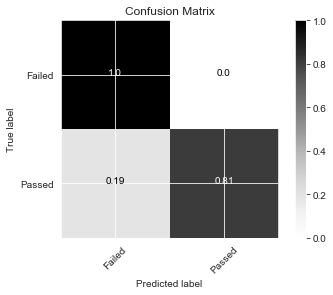

In [58]:
plot_confusion_matrix(cnf_matrix,['Failed','Passed'],normalize=True)